In [138]:
!pip install scikit-learn audiomentations pyroomacoustics

In [489]:
!pip install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 433.9 kB/s eta 0:00:00 kB/s eta 0:00:01:01


In [490]:
import os
from matplotlib import pyplot as plt
import numpy as np
import librosa
import uuid
from tqdm import tqdm

In [399]:
from audiomentations import (
    AddGaussianNoise, 
    AddGaussianSNR, 
    BandPassFilter, 
    Compose, 
    ClippingDistortion, 
    PolarityInversion, 
)

# Processing Functions

In [443]:
def get_melspectrogram_db(file_path, sr=48000, n_fft=2048, hop_length=512, n_mels=128, fmin=20, fmax=8300, top_db=80, sec=5):
    wav,sr = librosa.load(file_path,sr=sr)
    if wav.shape[0]<sec*sr:
        wav=np.pad(wav,int(np.ceil((sec*sr-wav.shape[0])/2)),mode='reflect')
    
    wav=wav[:sec*sr]
    
    spec=librosa.feature.melspectrogram(
        y=wav, sr=sr, n_fft=n_fft,
        hop_length=hop_length,n_mels=n_mels,fmin=fmin,fmax=fmax
    )
    spec_db=librosa.power_to_db(spec,top_db=top_db)
    
    return spec_db

def spec_to_image(spec, eps=1e-6):
    mean = spec.mean()
    std = spec.std()
    spec_norm = (spec - mean) / (std + eps)
    spec_min, spec_max = spec_norm.min(), spec_norm.max()
    
    spec_scaled = (spec_norm - spec_min) / (spec_max - spec_min)
    spec_scaled = spec_scaled.astype(np.float32)
#     spec_scaled = tf.expand_dims(spec_scaled, axis=2)
    return spec_scaled

def get_spec(wav, sr=48000, n_fft=2048, hop_length=512, n_mels=128, fmin=20, fmax=8300, top_db=80, sec=5):
    wav=wav[:sec*sr]
    
    spec=librosa.feature.melspectrogram(
        y=wav, sr=sr, n_fft=n_fft,
        hop_length=hop_length,n_mels=n_mels,fmin=fmin,fmax=fmax
    )
    spec_db=librosa.power_to_db(spec,top_db=top_db)
    
    return spec_db

def transform_audio(file_name, sr=48000):
    audio, _ = librosa.load(file_name, sr=sr)
    
    transform = Compose([
        AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.02, p=0.5),
        AddGaussianSNR(p=0.5),
        ClippingDistortion(p=0.5),
        PolarityInversion(p=0.25),
        BandPassFilter(p=0.25)
    ])
    taudio = transform(audio, sample_rate=sr)
    
    return taudio

def display_audio(filename, sr=48000):
    s = get_melspectrogram_db(filename)
    plt.figure()
    plt.imshow(S)
    plt.show()

In [421]:
BASE_AMAN = os.path.join('data', 'base_aman.wav')
IMRAN = os.path.join('data', 'imran', 'imran.wav')

In [422]:
S = get_melspectrogram_db(IMRAN)

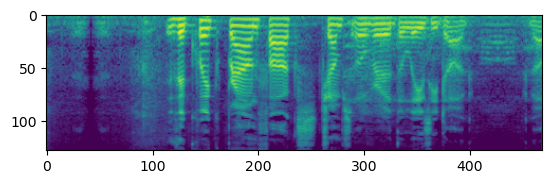

In [423]:
plt.figure()
plt.imshow(S)
plt.show()

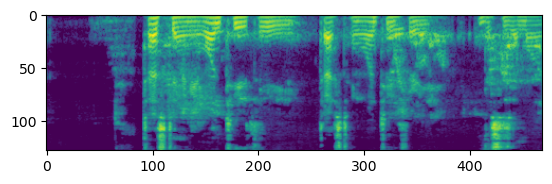

In [403]:
image = spec_to_image(S)
plt.figure()
plt.imshow(image)
plt.show()

In [404]:
S

array([[-49.002144, -51.56331 , -59.763763, ..., -25.628508, -31.114307,
        -21.0659  ],
       [-45.040543, -47.78139 , -59.763763, ..., -11.973267, -14.172678,
        -13.419514],
       [-42.385597, -41.274025, -47.02672 , ...,  -9.359166,  -9.810422,
        -10.886902],
       ...,
       [-59.763763, -59.763763, -59.763763, ..., -53.545166, -56.52403 ,
        -56.952152],
       [-59.763763, -59.763763, -59.763763, ..., -56.826126, -58.819027,
        -57.272453],
       [-59.763763, -59.763763, -59.763763, ..., -50.3694  , -55.05204 ,
        -55.75888 ]], dtype=float32)

In [51]:
image

array([[0.13452025, 0.10250568, 0.        , ..., 0.4266907 , 0.3581182 ,
        0.48372325],
       [0.18404026, 0.14977965, 0.        , ..., 0.5973812 , 0.56988853,
        0.5793031 ],
       [0.21722707, 0.23112172, 0.15921307, ..., 0.63005745, 0.62441677,
        0.6109608 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.07773247, 0.04049669,
        0.03514515],
       [0.        , 0.        , 0.        , ..., 0.03672047, 0.01180922,
        0.03114139],
       [0.        , 0.        , 0.        , ..., 0.11742955, 0.05889656,
        0.05006104]], dtype=float32)

In [58]:
from IPython.display import Audio

In [424]:
IPython.display.Audio(IMRAN)

In [341]:
# !pip install 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.4 MB/s eta 0:00:009 MB/s eta 0:00:01:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.10.4-py3-none-any.whl (222 kB)
  Using cached Cython-0.29.34-py2.py3-none-any.whl (988 kB)
  Created wheel for pyroomacoustics: filename=pyroomacoustics-0.7.3-cp310-cp310-macosx_11_0_arm64.whl size=560703 sha256=3b577903f422bc8ff2994c7f402a95012f9dc0fcfe811f39c92486b1cd550729
  Stored in directory: /Users/amanmibra/Library/Caches/pip/wheels/6b/f3/67/0d0c4c06234c59c14e5ccf72774bd5c5f1b43c3083043c7fb7
Successfully built pyroomacoustics


In [366]:
from audiomentations import PolarityInversion, BandPassFilter, ClippingDistortion, Compose, AddGaussianNoise, AddGaussianSNR, LowPassFilter

In [367]:
audio, _ = librosa.load(BASE_AMAN, sr=48000)

In [368]:
display(Audio(audio, rate=48000))

In [377]:
sr = 48000
transform = Compose([
#     AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.2, p=0.5),
    ClippingDistortion(p=1.0),
    PolarityInversion(p=1.0),
])
taudio = transform(audio, sample_rate=sr)

In [378]:
taudio.shape

(262016,)

In [379]:
audio.shape

(262016,)

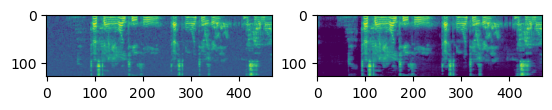

In [412]:
fig = plt.figure()
fig.add_subplot(1,2, 1)
plt.imshow(get_spec(taudio))
fig.add_subplot(1,2, 2)
plt.imshow(S)
plt.show(block=True)

In [413]:
display(Audio(taudio, rate=48000))

In [260]:
get_spec(taudio).shape

(128, 469)

In [261]:
S.shape

(128, 469)

In [411]:
taudio = transform_audio(BASE_AMAN)

In [453]:
labels = os.listdir('data')

In [456]:
labels

['aman', 'imran', 'labib']

In [454]:
assert len(labels) == 3

In [500]:
for label in labels:
    files = os.listdir(os.path.join('data', label))
    for file in files:
        if ".i" in file:
            continue
        filepath = os.path.join('data', label, file)
#         audio, _ = librosa.load(filepath, sr=sr)
        generate_duplicate_wav(filepath, label)
        

Generating wav duplicates of wavfile(data/aman/aman_1.wav)...: 100%|███████████████████████████████████████████████| 300/300 [00:01<00:00, 154.41it/s]
Generating wav duplicates of wavfile(data/aman/aman_3.wav)...: 100%|███████████████████████████████████████████████| 300/300 [00:02<00:00, 141.77it/s]
Generating wav duplicates of wavfile(data/aman/aman_2.wav)...: 100%|███████████████████████████████████████████████| 300/300 [00:02<00:00, 110.58it/s]
Generating wav duplicates of wavfile(data/aman/aman_6.wav)...: 100%|███████████████████████████████████████████████| 300/300 [00:02<00:00, 110.91it/s]
Generating wav duplicates of wavfile(data/aman/aman_5.wav)...: 100%|███████████████████████████████████████████████| 300/300 [00:02<00:00, 103.99it/s]
Generating wav duplicates of wavfile(data/aman/aman_4.wav)...: 100%|███████████████████████████████████████████████| 300/300 [00:02<00:00, 108.98it/s]
Generating wav duplicates of wavfile(data/imran/Imran 1.wav)...: 100%|████████████████████████

In [450]:
1500/5

300.0

In [476]:
from scipy.io import wavfile 

In [478]:
wavfile.write('test.wav', sr, taudio)

In [482]:
os.path.exists('test.wav')

True

In [486]:
display(Audio(librosa.load('test.wav', sr=sr)[0], rate=sr))

In [499]:
def generate_duplicate_wav(filepath, label, sr=48000, augmented=True, num_of_duplicates=300):
    for i in tqdm(range(num_of_duplicates), f"Generating wav duplicates of wavfile({filepath})..."):
        if augmented:
            audio = transform_audio(filepath)
        else:
            audio = librosa.load(filepath, sr=sr)
        
        new_filename = f"{label}_{uuid.uuid4().hex}"
        new_filepath = os.path.join('data', label, new_filename)
        wavfile.write(new_filepath, sr, audio)
        

In [508]:
length = 0
for label in labels:
    files = os.listdir(os.path.join('data', label))
    for file in files:
        if ".i" in file:
            continue
        filepath = os.path.join('data', label, file)
        length += 1
        
length

5418

In [506]:
# remove accidental files created
for f in os.listdir():
    if any(f"{label}_" in f for label in labels):
        print(f)
        os.remove(f)